In [1]:
%pip -q install pandas
%pip -q install numpy
%pip -q install matplotlib
%pip -q install statsmodels
%pip -q install joblib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-01-01 to 2024-12-31
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   SumIncome(Wash)   366 non-null    int64
 1   SumIncome(Dryer)  366 non-null    int64
 2   SumTotal          366 non-null    int64
 3   SumExpenses       366 non-null    int64
dtypes: int64(4)
memory usage: 14.3 KB
None
            SumIncome(Wash)  SumIncome(Dryer)  SumTotal  SumExpenses
NewDate                                                             
2024-01-01             2660              1950      4610            0
2024-01-02             2330              1850      4180         1500
2024-01-03             1940              2000      3940            0
2024-01-04             2800              2550      5350            0
2024-01-05             3020              3400      6420            0


C:\Users\grape\AppData\Local\Temp\ipykernel_12464\3615227200.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data['SumTotal'].resample('M').mean()
c:\Users\grape\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\grape\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\grape\AppData\Local\Temp\ipykernel_12464\3615227200.py:27: FutureWarning: 'M' is deprecated and will be removed in a futur

15 15


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

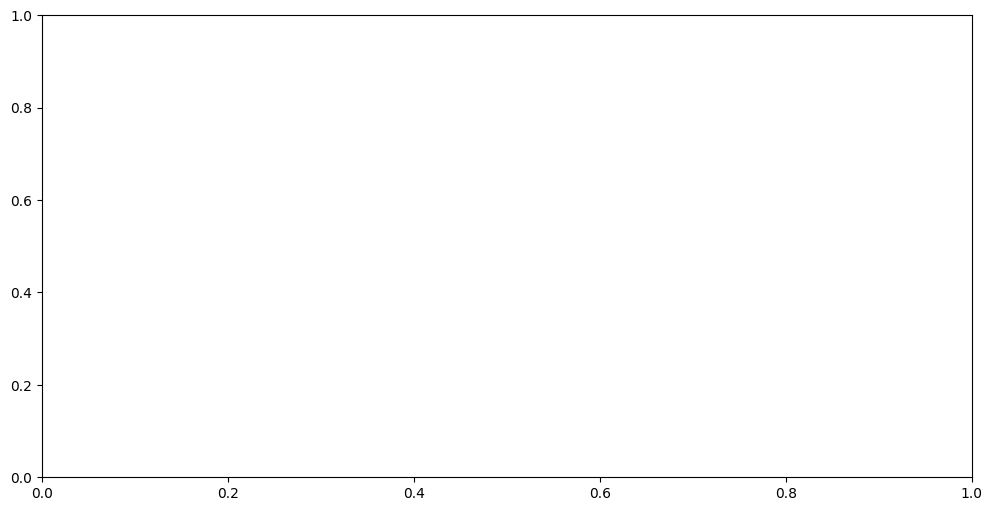

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib

# โหลดข้อมูลจากไฟล์ CSV
file_path = "WashAnalytics_datafinal1.csv"  # เปลี่ยนชื่อไฟล์ตามจริง
data = pd.read_csv(file_path, parse_dates=["NewDate"], index_col="NewDate")

# ตรวจสอบข้อมูล
print(data.info())
print(data.head())

# รับค่าจำนวนวันที่ผู้ใช้ต้องการพยากรณ์
future_days = int(input("กรุณากรอกจำนวนวันที่ต้องการพยากรณ์: "))

# คำนวณค่าเฉลี่ยรายเดือนของข้อมูลเก่า
data_monthly = data['SumTotal'].resample('M').mean()

# สร้างโมเดลพยากรณ์รายได้ด้วย SARIMA
model = SARIMAX(data_monthly, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# ทำนายรายได้ล่วงหน้าตามจำนวนวันที่ผู้ใช้กำหนด (โดยเปลี่ยนให้เป็นรายเดือน)
future_months = max(1, future_days // 30)  # แปลงเป็นจำนวนเดือน
future_dates = pd.date_range(start=data_monthly.index[-1], periods=future_months + 1, freq='M')[1:]
forecast = result.forecast(steps=future_months)

# รวมข้อมูลเก่า + ค่าพยากรณ์ เพื่อให้เส้นกราฟต่อเนื่องกัน
full_dates = pd.concat([pd.Series(data_monthly.index), pd.Series(future_dates)]).reset_index(drop=True)
full_values = pd.concat([data_monthly, pd.Series(forecast, index=future_dates)]).reset_index(drop=True)

# Ensure both full_dates and full_values are of the same length
print(len(full_dates), len(full_values))

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(full_dates, full_values, label="Actual & Forecasted Income", color="#29B6F6", linewidth=2, marker='o', linestyle='-')

# Add a vertical line to indicate the forecast start point
plt.axvline(x=split_date, color="gray", linestyle="--", linewidth=1.5, label="Forecast Start")

# Adjust graph for better readability
plt.xlabel("Date", fontsize=12)
plt.ylabel("Income (THB)", fontsize=12)
plt.title(f"Laundry Shop Income Forecast (Next {future_months} Months)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

# Hide top and right borders for aesthetics
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Show the legend
plt.legend(fontsize=12, loc="upper left")

# Display the graph
plt.tight_layout()
plt.show()


# แสดงค่าพยากรณ์เป็นตาราง
forecast_df = pd.DataFrame({"Date": future_dates, "Predicted_Income(THB)": forecast})
print(forecast_df)


# Save the SARIMA model using joblib
joblib.dump(result, 'Predict Income.joblib')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib

# โหลดข้อมูลจากไฟล์ CSV
file_path = "WashAnalytics_datafinal1.csv"  # เปลี่ยนชื่อไฟล์ตามจริง
data = pd.read_csv(file_path, parse_dates=["NewDate"], index_col="NewDate")

# ตรวจสอบข้อมูล
print(data.info())
print(data.head())

# รับค่าจำนวนวันที่ผู้ใช้ต้องการพยากรณ์
future_days = int(input("กรุณากรอกจำนวนวันที่ต้องการพยากรณ์: "))

# คำนวณค่าเฉลี่ยรายเดือนของข้อมูลเก่า
data_monthly = data['SumTotal'].resample('M').mean()

# สร้างโมเดลพยากรณ์รายได้ด้วย SARIMA
model = SARIMAX(data_monthly, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# ทำนายรายได้ล่วงหน้าตามจำนวนวันที่ผู้ใช้กำหนด (โดยเปลี่ยนให้เป็นรายเดือน)
future_months = max(1, future_days // 30)  # แปลงเป็นจำนวนเดือน
future_dates = pd.date_range(start=data_monthly.index[-1], periods=future_months + 1, freq='M')[1:]
forecast = result.forecast(steps=future_months)

# รวมข้อมูลเก่า + ค่าพยากรณ์ เพื่อให้เส้นกราฟต่อเนื่องกัน
full_dates = pd.concat([data_monthly.index, future_dates])
full_values = pd.concat([data_monthly, pd.Series(forecast, index=future_dates)])

# หาจุดแบ่งอดีต-อนาคต (จุดสุดท้ายของข้อมูลจริง)
split_date = data_monthly.index[-1]

# Convert to numpy arrays for plotting
full_dates = np.array(full_dates)
full_values = np.array(full_values)

# Ensure that full_dates and full_values have the same length
print(f"Length of full_dates: {len(full_dates)}")
print(f"Length of full_values: {len(full_values)}")

# สร้างกราฟ
plt.figure(figsize=(12, 6))
plt.plot(full_dates, full_values, label="Actual & Forecasted Income", color="#29B6F6", linewidth=2, marker='o', linestyle='-')

# **เพิ่มเส้นแบ่งอดีต-ปัจจุบัน**
plt.axvline(x=split_date, color="gray", linestyle="--", linewidth=1.5, label="Forecast Start")

# ปรับแต่งกราฟให้อ่านง่ายขึ้น
plt.xlabel("Date", fontsize=12)
plt.ylabel("Income (THB)", fontsize=12)
plt.title(f"Laundry Shop Income Forecast (Next {future_months} Months)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

# ซ่อนเส้นขอบบางส่วนเพื่อความสวยงาม
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# แสดง legend
plt.legend(fontsize=12, loc="upper left")

# แสดงกราฟ
plt.tight_layout()
plt.show()

# แสดงค่าพยากรณ์เป็นตาราง
forecast_df = pd.DataFrame({"Date": future_dates, "Predicted_Income(THB)": forecast})
print(forecast_df)

# Save the SARIMA model using joblib
joblib.dump(result, 'Predict Income.joblib')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-01-01 to 2024-12-31
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   SumIncome(Wash)   366 non-null    int64
 1   SumIncome(Dryer)  366 non-null    int64
 2   SumTotal          366 non-null    int64
 3   SumExpenses       366 non-null    int64
dtypes: int64(4)
memory usage: 14.3 KB
None
            SumIncome(Wash)  SumIncome(Dryer)  SumTotal  SumExpenses
NewDate                                                             
2024-01-01             2660              1950      4610            0
2024-01-02             2330              1850      4180         1500
2024-01-03             1940              2000      3940            0
2024-01-04             2800              2550      5350            0
2024-01-05             3020              3400      6420            0


C:\Users\grape\AppData\Local\Temp\ipykernel_12464\3900452552.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data['SumTotal'].resample('M').mean()
c:\Users\grape\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\grape\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\grape\AppData\Local\Temp\ipykernel_12464\3900452552.py:27: FutureWarning: 'M' is deprecated and will be removed in a futur

TypeError: cannot concatenate object of type '<class 'pandas.core.indexes.datetimes.DatetimeIndex'>'; only Series and DataFrame objs are valid

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-01-01 to 2024-12-31
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   SumIncome(Wash)   366 non-null    int64
 1   SumIncome(Dryer)  366 non-null    int64
 2   SumTotal          366 non-null    int64
 3   SumExpenses       366 non-null    int64
dtypes: int64(4)
memory usage: 14.3 KB
None
            SumIncome(Wash)  SumIncome(Dryer)  SumTotal  SumExpenses
NewDate                                                             
2024-01-01             2660              1950      4610            0
2024-01-02             2330              1850      4180         1500
2024-01-03             1940              2000      3940            0
2024-01-04             2800              2550      5350            0
2024-01-05             3020              3400      6420            0


C:\Users\grape\AppData\Local\Temp\ipykernel_12464\626931915.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data['SumTotal'].resample('M').mean()
c:\Users\grape\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\grape\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\grape\AppData\Local\Temp\ipykernel_12464\626931915.py:27: FutureWarning: 'M' is deprecated and will be removed in a future 

Length of full_dates: 15
Length of full_values: 15


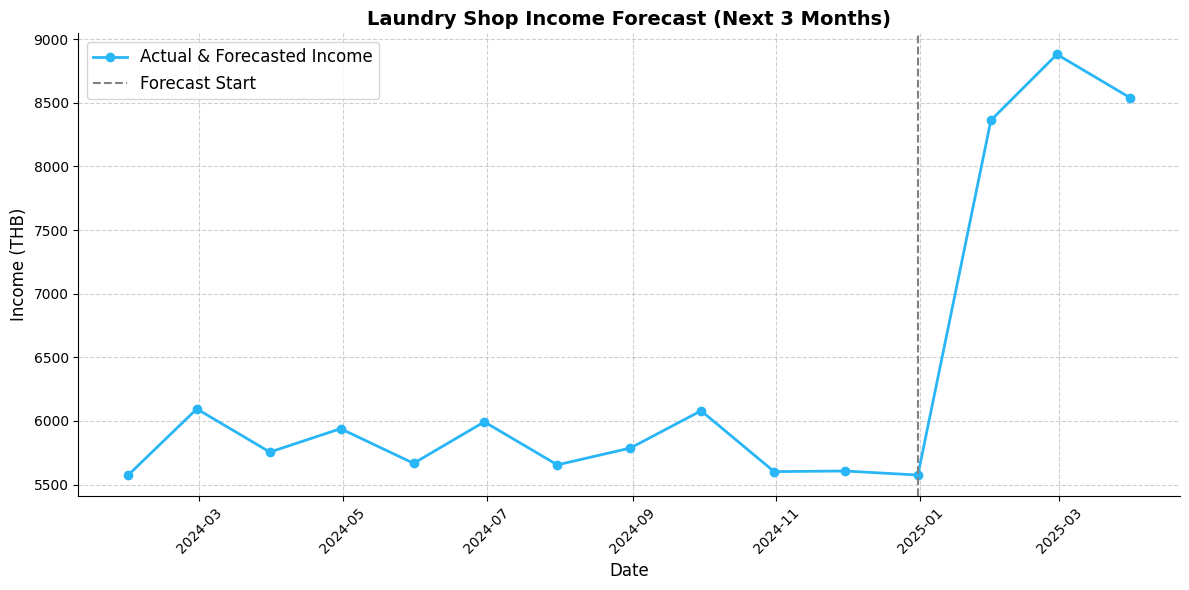

                 Date  Predicted_Income(THB)
2025-01-31 2025-01-31                 8363.0
2025-02-28 2025-02-28                 8881.0
2025-03-31 2025-03-31                 8541.0


['Predict_Income1.joblib']

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib

# โหลดข้อมูลจากไฟล์ CSV
file_path = "WashAnalytics_datafinal1.csv"  # เปลี่ยนชื่อไฟล์ตามจริง
data = pd.read_csv(file_path, parse_dates=["NewDate"], index_col="NewDate")

# ตรวจสอบข้อมูล
print(data.info())
print(data.head())

# รับค่าจำนวนวันที่ผู้ใช้ต้องการพยากรณ์
future_days = int(input("กรุณากรอกจำนวนวันที่ต้องการพยากรณ์: "))

# คำนวณค่าเฉลี่ยรายเดือนของข้อมูลเก่า
data_monthly = data['SumTotal'].resample('M').mean()

# สร้างโมเดลพยากรณ์รายได้ด้วย SARIMA
model = SARIMAX(data_monthly, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# ทำนายรายได้ล่วงหน้าตามจำนวนวันที่ผู้ใช้กำหนด (โดยเปลี่ยนให้เป็นรายเดือน)
future_months = max(1, future_days // 30)  # แปลงเป็นจำนวนเดือน
future_dates = pd.date_range(start=data_monthly.index[-1], periods=future_months + 1, freq='M')[1:]
forecast = result.forecast(steps=future_months).round()

# Convert `DatetimeIndex` to `Series` for concatenation
full_dates = pd.concat([pd.Series(data_monthly.index), pd.Series(future_dates)])
full_values = pd.concat([data_monthly, pd.Series(forecast, index=future_dates)])

# หาจุดแบ่งอดีต-อนาคต (จุดสุดท้ายของข้อมูลจริง)
split_date = data_monthly.index[-1]

# Convert to numpy arrays for plotting
full_dates = np.array(full_dates)
full_values = np.array(full_values)

# Ensure both full_dates and full_values have the same length
print(f"Length of full_dates: {len(full_dates)}")
print(f"Length of full_values: {len(full_values)}")

# สร้างกราฟ
plt.figure(figsize=(12, 6))
plt.plot(full_dates, full_values, label="Actual & Forecasted Income", color="#29B6F6", linewidth=2, marker='o', linestyle='-')

# **เพิ่มเส้นแบ่งอดีต-ปัจจุบัน**
plt.axvline(x=split_date, color="gray", linestyle="--", linewidth=1.5, label="Forecast Start")

# ปรับแต่งกราฟให้อ่านง่ายขึ้น
plt.xlabel("Date", fontsize=12)
plt.ylabel("Income (THB)", fontsize=12)
plt.title(f"Laundry Shop Income Forecast (Next {future_months} Months)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

# ซ่อนเส้นขอบบางส่วนเพื่อความสวยงาม
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# แสดง legend
plt.legend(fontsize=12, loc="upper left")

# แสดงกราฟ
plt.tight_layout()
plt.show()

# แสดงค่าพยากรณ์เป็นตาราง
forecast_df = pd.DataFrame({"Date": future_dates, "Predicted_Income(THB)": forecast})
print(forecast_df)

# Save the SARIMA model using joblib
joblib.dump(result, 'Predict_Income1.joblib')
